<a href="https://colab.research.google.com/github/Aadya2901/explainable-ai-alzheimers/blob/main/AI_4_Alzheimers_Explainable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable Machine Learning for Early Alzheimer’s Risk Detection

## 1️⃣ Notebook Setup

This notebook presents an end-to-end **Explainable Machine Learning** pipeline for early Alzheimer’s risk detection.

The focus is on:
- Ethical data usage
- Transparent model behavior
- Clear evaluation metrics

We begin by importing essential libraries for data processing, visualization, modeling, and explainability.


In [22]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Explainability
!pip install shap
import shap

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


## 2️⃣ Load Dataset (Synthetic Data)

To ensure ethical compliance and avoid the use of sensitive patient information, a **synthetic dataset** is generated.

The dataset is designed to resemble real-world Alzheimer’s indicators such as:
- Age
- MMSE score
- Memory score
- Cognitive score

The target variable `Diagnosis` is binary:
- `0` → No Alzheimer’s  
- `1` → Alzheimer’s

This synthetic data enables safe experimentation while demonstrating a complete machine learning workflow.


In [23]:
# Create a synthetic Alzheimer’s dataset (privacy-safe)

np.random.seed(42)
n = 500

df = pd.DataFrame({
    "Age": np.random.randint(60, 90, n),
    "MMSE_Score": np.random.randint(10, 30, n),
    "Memory_Score": np.random.randint(0, 100, n),
    "Cognitive_Score": np.random.randint(0, 100, n),
    "Diagnosis": np.random.choice([0, 1], n)  # 0 = No Alzheimer’s, 1 = Alzheimer’s
})

df.head()


,Age,MMSE_Score,Memory_Score,Cognitive_Score,Diagnosis
0,66,19,69,86,0
1,79,12,25,79,0
2,88,27,67,69,0
3,74,22,18,71,0
4,70,16,83,24,1


## 3️⃣ Exploratory Data Analysis (EDA)

An initial exploratory analysis is performed to understand the dataset.

This step includes:
- Inspecting the dataset structure and data types
- Reviewing summary statistics
- Checking for missing values
- Visualizing the distribution of the target variable

EDA helps validate data quality and provides insights before model training.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              500 non-null    int64
 1   MMSE_Score       500 non-null    int64
 2   Memory_Score     500 non-null    int64
 3   Cognitive_Score  500 non-null    int64
 4   Diagnosis        500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


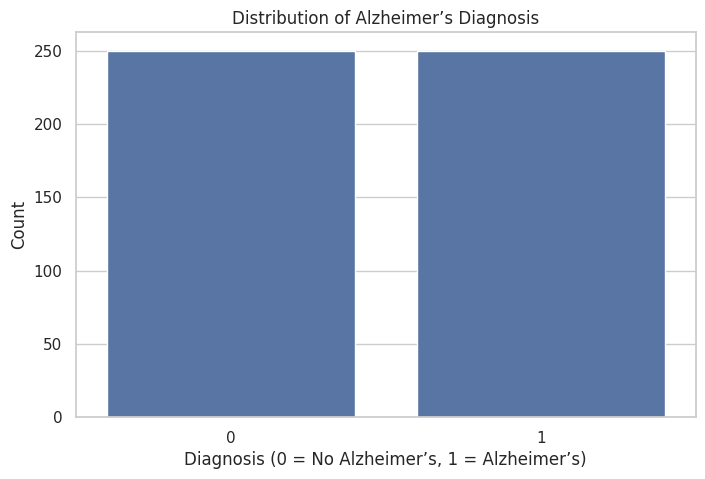

In [24]:
# Dataset overview
df.info()
df.describe()

# Check missing values
df.isnull().sum()

# Target distribution
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Alzheimer’s Diagnosis")
plt.xlabel("Diagnosis (0 = No Alzheimer’s, 1 = Alzheimer’s)")
plt.ylabel("Count")
plt.show()


## 4️⃣ Data Preprocessing

The dataset is prepared for model training by:
- Separating features and target
- Handling missing values
- Performing stratified train–test split
- Scaling features for linear models


In [25]:
# Drop rows with missing target
df = df.dropna(subset=['Diagnosis'])

# Separate features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Handle missing values (simple approach)
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5️⃣ Baseline Model — Logistic Regression

Logistic Regression is used as a baseline model due to its simplicity and interpretability.


In [26]:
# Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.4
ROC-AUC Score: 0.38159999999999994

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.38      0.39        50
           1       0.40      0.42      0.41        50

    accuracy                           0.40       100
   macro avg       0.40      0.40      0.40       100
weighted avg       0.40      0.40      0.40       100



## 6️⃣ Advanced Model — Random Forest

A Random Forest model is used to capture non-linear relationships and improve predictive performance.


In [27]:
# Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.44
ROC-AUC Score: 0.3728

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.46      0.45        50
           1       0.44      0.42      0.43        50

    accuracy                           0.44       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.44      0.44      0.44       100



## 7️⃣ Confusion Matrix

The confusion matrix visualizes true vs predicted labels, highlighting misclassification patterns.


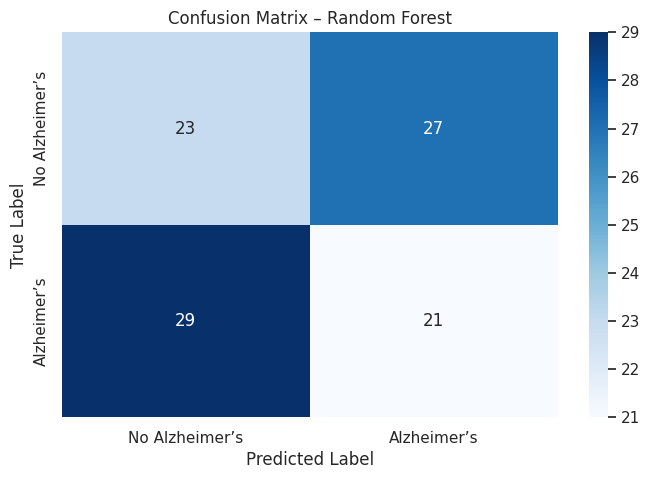

In [28]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Alzheimer’s", "Alzheimer’s"],
    yticklabels=["No Alzheimer’s", "Alzheimer’s"]
)

plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 8️⃣ Explainability — Feature Importance

Random Forest feature importance is used to interpret which features contribute most to predictions.


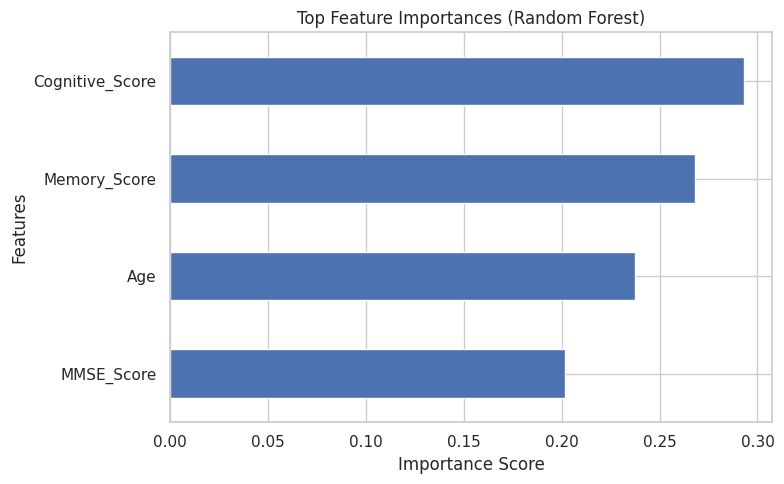

In [29]:
# Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(10).plot(kind='barh')

plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Feature importance analysis revealed that cognitive and memory-related scores were the strongest predictors.

### 9️⃣ Explainability — SHAP Values — Feature Importance (Random Forest)

Explainability is critical for healthcare-related machine learning models.

This step uses **Random Forest feature importance** to identify which input features contribute most to the model’s predictions.  
Understanding feature contributions improves transparency and helps build trust in the model’s decision-making process.

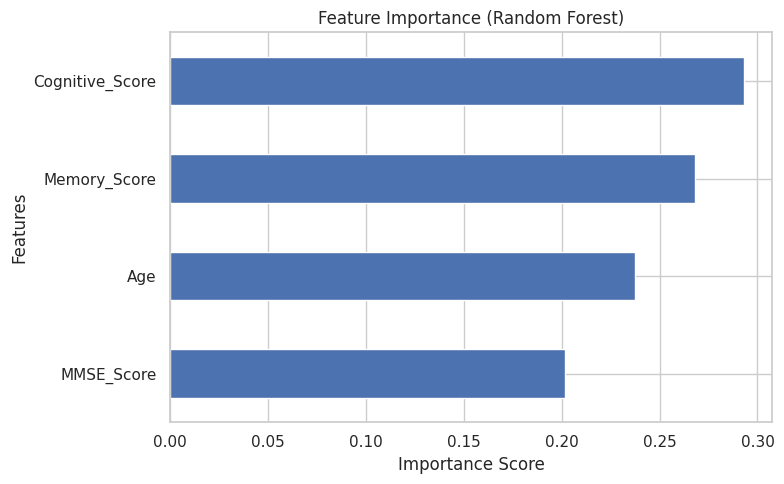

In [30]:
# Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh')

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## 🔟 Key Observations

- Cognitive and memory-related features strongly influence predictions.
- Tree-based models capture non-linear patterns better than linear baselines.
- Explainability improves transparency and trust in healthcare AI systems.
- Performance is limited due to synthetic data, but the pipeline is complete and ethical.


## ⚠️ Ethical Disclaimer

This project is intended **only for research and educational purposes**.

It does not provide medical diagnosis or clinical recommendations.
All predictions should be interpreted by qualified healthcare professionals.

No real patient data was used.
